% DATASET: https://www.muratkoklu.com/datasets/
% Reference: Cinar, I. and Koklu, M. (2019). Classification of Rice Varieties Using Artificial Intelligence Methods. International Journal of Intelligent Systems and Applications in Engineering,  vol.7, no.3 (Sep. 2019), pp.188-194.
% https://doi.org/10.18201/ijisae.2019355381(https://www.ijisae.org/IJISAE/article/view/1068)
% DATASET: https://www.muratkoklu.com/datasets/

@RELATION Rice_Cammeo_Osmancik
@ATTRIBUTE Area Integer
@ATTRIBUTE Perimeter Real
@ATTRIBUTE Major_Axis_Length Real
@ATTRIBUTE Minor_Axis_Length Real
@ATTRIBUTE Eccentricity	Real
@ATTRIBUTE Convex_Area	Integer
@ATTRIBUTE Extent Real
@ATTRIBUTE Class {Cammeo, Osmancik}

In [95]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [57]:
cols = ['Area', 'Perimeter', 'Major_axis', 'Minor_axis', 'Eccentricity', 'Extent', 'Convex', 'Class']
df = pd.read_csv('Rice_Cammeo_Osmancik.arff', names=cols)

In [58]:
df.head()

,Area,Perimeter,Major_axis,Minor_axis,Eccentricity,Extent,Convex,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [59]:
len(df.columns)

8

In [60]:
df.Class.unique()

array(['Cammeo', 'Osmancik'], dtype=object)

In [61]:
df.isna().sum()

Area            0
Perimeter       0
Major_axis      0
Minor_axis      0
Eccentricity    0
Extent          0
Convex          0
Class           0
dtype: int64

In [62]:
le = LabelEncoder()
df.Class = le.fit_transform(df['Class'])

In [63]:
df.Class.unique()

array([0, 1])

In [64]:
df.head()

,Area,Perimeter,Major_axis,Minor_axis,Eccentricity,Extent,Convex,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,0
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,0
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,0
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,0
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,0


In [65]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [66]:
X

array([[1.52310000e+04, 5.25578979e+02, 2.29749878e+02, ...,
        9.28882003e-01, 1.56170000e+04, 5.72895527e-01],
       [1.46560000e+04, 4.94311005e+02, 2.06020065e+02, ...,
        8.95404994e-01, 1.50720000e+04, 6.15436316e-01],
       [1.46340000e+04, 5.01122009e+02, 2.14106781e+02, ...,
        9.12118077e-01, 1.49540000e+04, 6.93258822e-01],
       ...,
       [1.24370000e+04, 4.42498993e+02, 1.83572922e+02, ...,
        8.81144345e-01, 1.26450000e+04, 6.26738548e-01],
       [9.88200000e+03, 3.92296997e+02, 1.61193985e+02, ...,
        8.74406099e-01, 1.00970000e+04, 6.59063637e-01],
       [1.14340000e+04, 4.04709991e+02, 1.61079269e+02, ...,
        8.25692177e-01, 1.15910000e+04, 8.02949429e-01]])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [68]:
X_train

array([[1.50740000e+04, 4.97178009e+02, 2.05639816e+02, ...,
        8.87848675e-01, 1.55360000e+04, 7.21105993e-01],
       [1.65820000e+04, 5.32357971e+02, 2.23358841e+02, ...,
        9.03455853e-01, 1.70890000e+04, 7.14310348e-01],
       [1.69330000e+04, 5.21921997e+02, 2.21332977e+02, ...,
        8.96414876e-01, 1.72120000e+04, 7.76743114e-01],
       ...,
       [1.06810000e+04, 4.21256012e+02, 1.78369446e+02, ...,
        8.99425089e-01, 1.09290000e+04, 5.57172656e-01],
       [1.15010000e+04, 4.39537994e+02, 1.82663071e+02, ...,
        8.94614279e-01, 1.18780000e+04, 5.83333313e-01],
       [1.26460000e+04, 4.73855988e+02, 2.04032516e+02, ...,
        9.20138478e-01, 1.29490000e+04, 6.76039755e-01]])

In [69]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [70]:
X_train

array([[ 1.39355459e+00,  1.21114255e+00,  9.71012023e-01, ...,
         5.34565981e-02,  1.45893494e+00,  7.52287936e-01],
       [ 2.26622796e+00,  2.20185073e+00,  1.98789390e+00, ...,
         7.98630201e-01,  2.33521173e+00,  6.64840637e-01],
       [ 2.46935021e+00,  1.90796170e+00,  1.87163106e+00, ...,
         4.62454726e-01,  2.40461421e+00,  1.46823412e+00],
       ...,
       [-1.14865637e+00, -9.26908188e-01, -5.94014604e-01, ...,
         6.06179076e-01, -1.14055455e+00, -1.35722896e+00],
       [-6.74125755e-01, -4.12066542e-01, -3.47606611e-01, ...,
         3.76484211e-01, -6.05083417e-01, -1.02059000e+00],
       [-1.15189843e-02,  5.54367605e-01,  8.78770262e-01, ...,
         1.59515161e+00, -7.74051189e-04,  1.72369346e-01]])

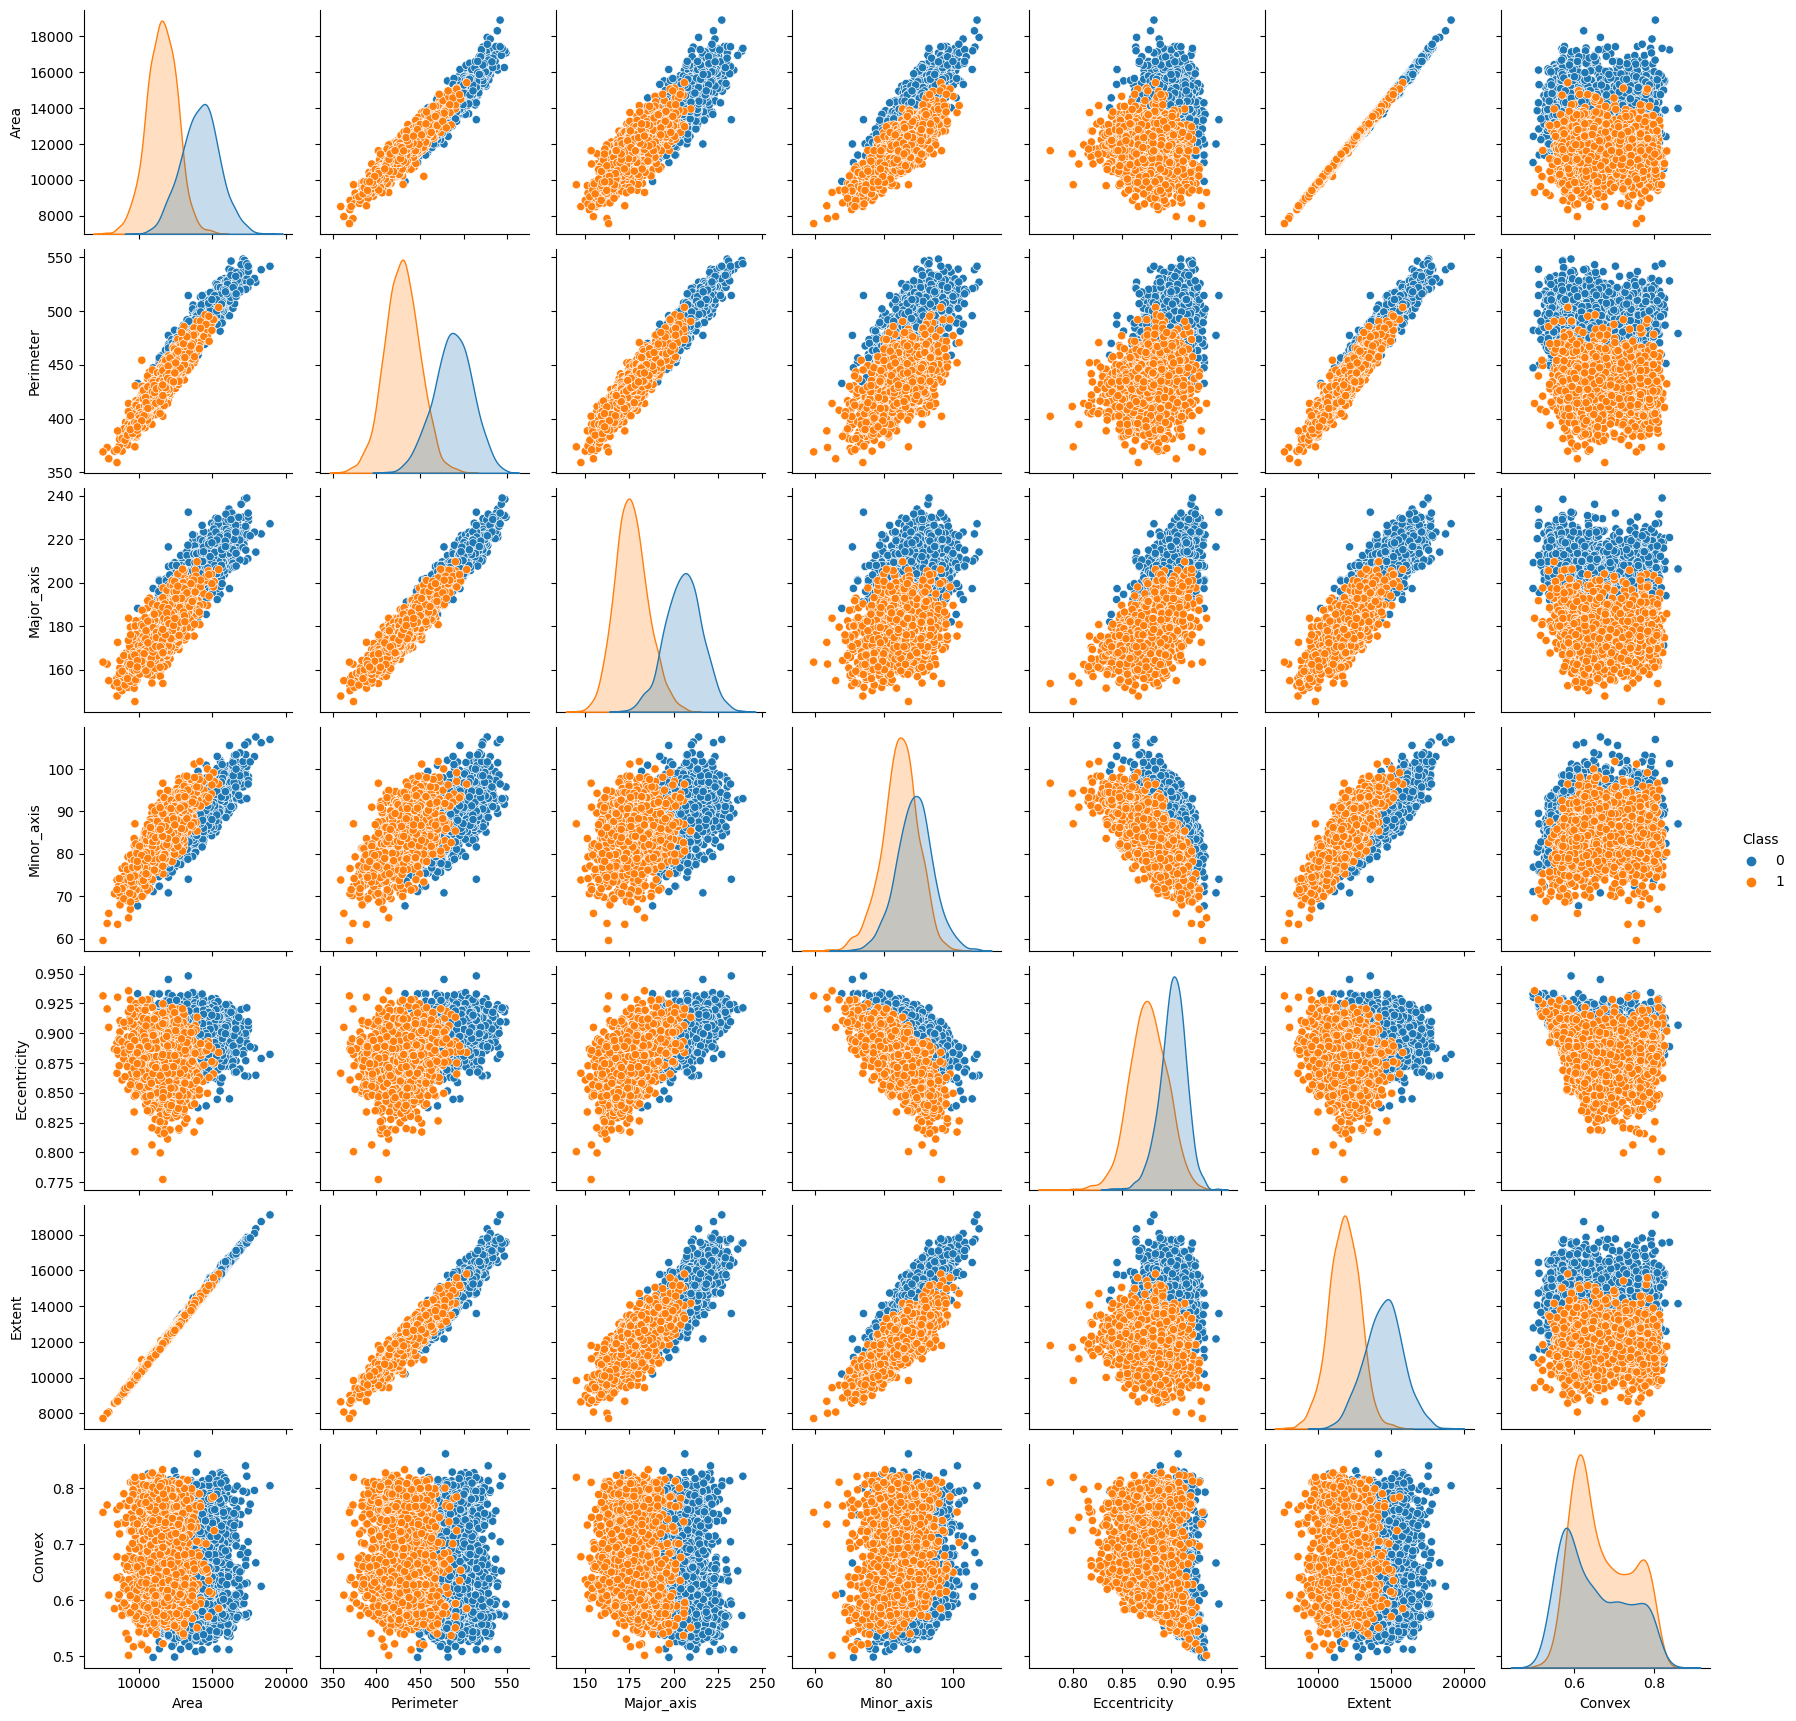

In [73]:
sns.pairplot(df, hue='Class')

In [75]:
logistic = LogisticRegression(random_state=0)
logistic.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [76]:
y_pred_log = logistic.predict(X_test)

In [87]:
y_pred_log = y_pred_log.reshape(len(y_pred_log), 1)
y_test = y_test.reshape(len(y_test), 1)

In [88]:
np.concatenate((y_test, y_pred_log), 1)

array([[1, 1],
       [0, 0],
       [1, 0],
       ...,
       [0, 0],
       [0, 0],
       [1, 1]])

In [89]:
np.round(accuracy_score(y_test, y_pred_log)*100, 2)

92.39

In [90]:
y_test.shape, y_pred_log.shape

((1524, 1), (1524, 1))

In [96]:
vector = SVC(kernel='rbf', random_state=0)
vector.fit(X_train, y_train)

SVC(random_state=0)

In [100]:
vector_pred_y = vector.predict(X_test).reshape(len(vector.predict(X_test)), 1)

In [102]:
np.concatenate((y_test,vector_pred_y), 1)

array([[1, 1],
       [0, 0],
       [1, 0],
       ...,
       [0, 0],
       [0, 0],
       [1, 1]])